# Laboratorio 1: Conceptos básicos de aprendizaje automático

En este laboratorio les tocará probar con distintos parámetros de los algoritmos de aprendizaje automático aprendidos hasta ahora. La idea es que vean como la selección de atributos, el cambio de hiperparámetros, y los distintos algoritmos afectan los resultados de un regresor o clasificador sobre un conjunto de datos.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

from ml.visualization import plot_confusion_matrix, classifier_boundary

np.random.seed(1234)  # Setup seed to be more deterministic

%matplotlib inline

## Regresión

### Carga de datos

In [3]:
boston_data = load_boston()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(506)
shuff_train = shuff_data[:400]
shuff_val = shuff_data[400:]

X_train = boston_data['data'][shuff_train]
X_val = boston_data['data'][shuff_val]

y_train = boston_data['target'][shuff_train]
y_val = boston_data['target'][shuff_val]

# Necesario para poder hacer un regresor por feature
feature_map = {feature: idx for idx, feature in enumerate(boston_data['feature_names'])}

print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Regresión sin regularización

Para revisar cómo afecta el cambio de parámetros y los distintos tipos de regresores y atributos (características) al resultado final del algoritmo de aprendizaje automático, lo que se va a hacer es entrenar el regresor tomando sólo un atributo y visualizar eso.

Se busca entrenar utilizando el conjunto de entrenamiento (el terminado en `train`) y evaluar utilizando el conjunto de validación (el terminado en `val`). Luego se visualiza la función calculada para cada conjunto y se la compara.

Los atributos posibles están listados en la descripción del conjunto de datos en la celda anterior. No todos son útiles para visualizar, en particular solo nos interesan los atributos numéricos y descartamos los atributos que se listan a continuación:

- `CHAS`: Atributo categórico (toma valor 0 o 1).
- `RAD`: Atributo categórico (índice).
- `MEDV`: Este valor se lo lista como atributo en la descripción del conjunto de datos pero en realidad es el valor de `y`, i.e. es el valor que tratamos de aproximar con el algoritmo de aprendizaje automático.

In [4]:
# Seleccionamos un atributo de los listados en la descripción que no sea categórico
selected_feature = 'LSTAT'  # TODO: modificar esto por algún otro valor para ver como cambian los resultados
feature_col = feature_map[selected_feature]
X_train_feature = X_train[:, feature_col].reshape(-1, 1)  # Hay que ser que sea una matriz no un vector para que funcione con scikit learn
X_val_feature = X_val[:, feature_col].reshape(-1, 1)

### Regresión lineal

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:
# Entrenamos un clasificador utilizando sólo ese atributo sobre el conjunto de entrenamiento (X_train, y_train)
model = LinearRegression()
model.fit(X_train_feature, y_train)

# Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o mean squared error)
# sobre el conjunto de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_val, y_val)
# Mientras más cercano a cero mejor
print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train_feature)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_val_feature)))

Media del error cuadrado para entrenamiento: 36.54
Media del error cuadrado para validación: 45.90


##### Visualización de la regresión lineal

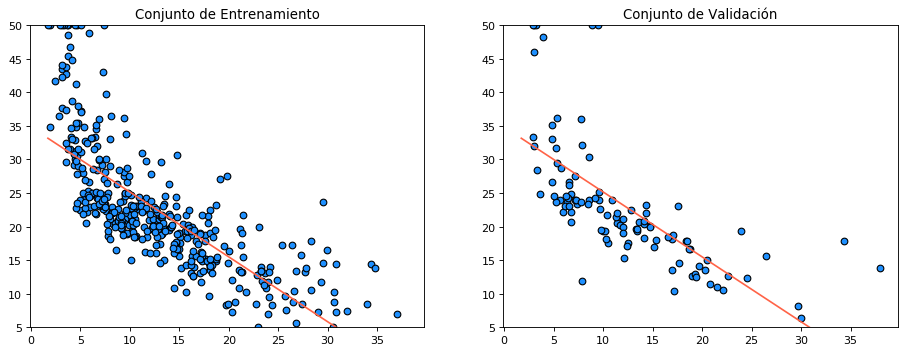

In [6]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
y_range_start = np.min(np.r_[y_train, y_val])
y_range_stop = np.max(np.r_[y_train, y_val])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

### Regresión polinomial

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [7]:
polynomial_degree = 2 # TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_feature)
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_poly_val)))

Media del error cuadrado para entrenamiento: 28.47
Media del error cuadrado para validación: 37.45


##### Visualización de la regresión polinomial

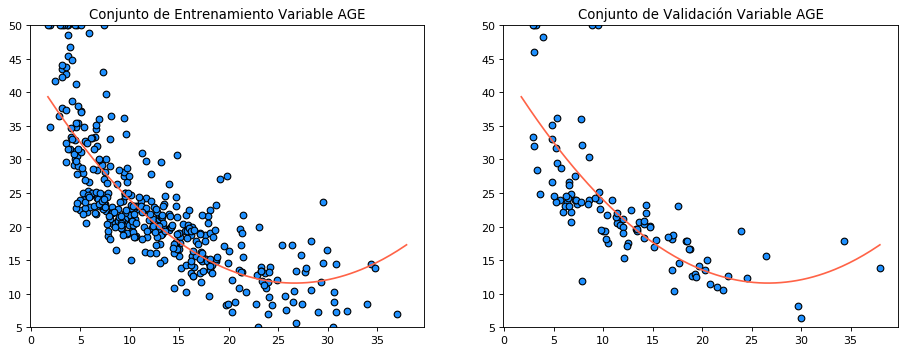

In [8]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
y_range_start = np.min(np.r_[y_train, y_val])
y_range_stop = np.max(np.r_[y_train, y_val])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento Variable AGE")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación Variable AGE")

plt.show()

### Regresión lineal con regularización

- https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [9]:
alpha = 0.01 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`.

model = Ridge(alpha=alpha)
model.fit(X_train_feature, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train_feature)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_val_feature)))

Media del error cuadrado para entrenamiento: 36.54
Media del error cuadrado para validación: 45.90


##### Visualización de la regresión lineal

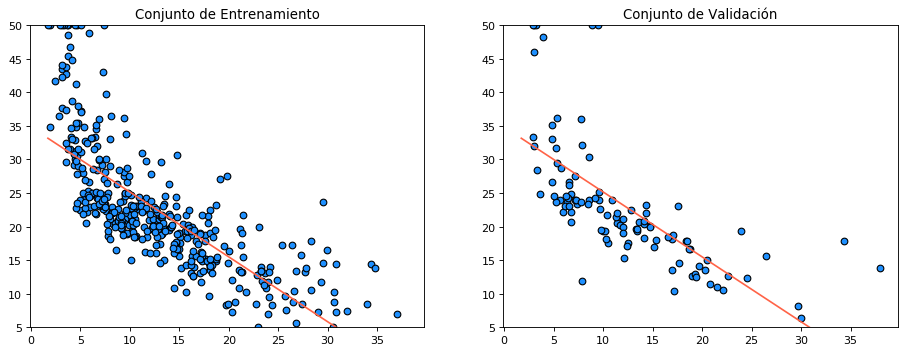

In [10]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
y_range_start = np.min(np.r_[y_train, y_val])
y_range_stop = np.max(np.r_[y_train, y_val])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

### Regresión polinomial con regularización

In [11]:
polynomial_degree = 3 # TODO: Grado del polinomio.
alpha = 0.01 #TODO: Parámetro de regularización. También denominado como parámetro `lambda`.

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_feature)
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)

model = Ridge(alpha=alpha)
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_poly_val)))

Media del error cuadrado para entrenamiento: 26.62
Media del error cuadrado para validación: 38.00


##### Visualización de la regresión polinomial

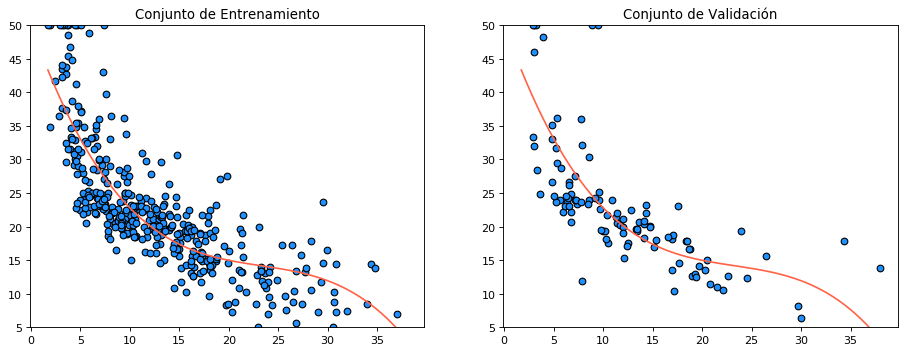

In [12]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
y_range_start = np.min(np.r_[y_train, y_val])
y_range_stop = np.max(np.r_[y_train, y_val])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

**Tabla Resumen Boston Data**

Se arma una tabla resumen con los distintos valores que se fueron probando en los modelos. Se dejan comentadas algunas líneas que se usaron para el armado de la tabla.

In [15]:
import pandas as pd

In [16]:
#df_columnas = {'Variable':[] , 'Modelo': [] ,'MSE_Train':[] ,'MSE_Val':[]} 
#df_test = pd.DataFrame(data= df_columnas)
#df_test

In [16]:
def insert_row(dict_to_apped):
    return df_test.append(dict_to_apped, ignore_index=True)

In [17]:
#df_test = insert_row(poli_reg3_age)
#df_test.to_csv('tabla_resumen_boston.csv')

In [18]:
df_test = pd.read_csv('tabla_resumen_boston.csv',sep=';')
df_test

,Variable,Modelo,MSE_Train,MSE_Val,Lambda
0,AGE,Regresion Lineal,71.485660,76.072840,NaN
1,AGE,Regresion Polinomial G2,70.065296,76.415952,NaN
2,AGE,Regresion Polinomial G3,69.291855,79.906668,NaN
3,AGE,Regresion Polinomial G4,68.538719,82.602624,NaN
4,AGE,Regresion Polinomial G5,68.538654,82.590554,NaN
5,LSTAT,Regresion Lineal,36.541473,45.897941,NaN
6,LSTAT,Regresion Polinomial G2,28.470187,37.451016,NaN
7,LSTAT,Regresion Polinomial G3,26.616760,38.002030,NaN
8,LSTAT,Regresion Polinomial G4,25.547906,35.509556,NaN
9,LSTAT,Regresion Polinomial G5,24.851675,35.271972,NaN


Se arma un dataframe con los distintos resultados luego de las pruebas variando el hiperparámetro lambda y los grados del polinomio. Se puede ver como con el parámetro lambda cercano a 0 los MSE obtenidos para los subconjuntos de entrenamiento y validación son muy similares a los de las regresiones sin regularización, ya que esto genera que el término sea casi nulo.

**ANÁLISIS SIN TÉRMINO DE REGULARIZACIÓN**

Para el caso de la variable **AGE** se puede observar que a medida que aumenta el grado del polinomio utilizado en la regresión polinomial se tiende a disminuir el MSE del subconjunto de entrenamiento y a aumentar el del validación. Esto es una muestra de que estamos en presencia de overfitting.

En cambio para la variable de **LSTAT** se observa que el MSE es mejor en caso de aplicar un polinomio de grado 2 antes que una regresión lineal. En la gráfica se puede identificar a simple vista un comportamiento que puede asociarse a una parábola. Mas allá de esto, se probó con polinomios de otros grados y el MSE comenzó a disminuir pero no se generó una disminución significativa. Entonces para evitar usar un polinomio que implique mayores recursos computacionales se opta por el de grado 2.

**ANÁLISIS CON TÉRMINO DE REGULARIZACIÓN**

Para el caso de la variable **AGE**, desde lambda 0.01 a lambda 100 no hay variaciones en los valores de MSE para el modelo de regresión lineal.

En caso de los otros modelos para la variable **AGE**, se logró bajar el MSE del conjunto Train al incorporar el parámetro de regularización, pero de todas formas no se encontró diferencia considerable entre aplicar un lambda entre 10 a 100. 

Al considerar para la variable **AGE** un polinomio de tercer grado, se logró reducir el MSE del conjunto de entrenamiento pero también aumenta el del conjunto de validación por lo que no se continuó probando en este sentido.

Para la variable **LSTAT**, al aplicar el modelo de regresión lineal con el término de regularización (lambda igual 100) no sufrieron cambios los valores de los MSE.

Se identificó el mismo resultado para el modelo de regresión polinomial grado 2, donde con parámetros lambda de 10 a 100 no se alteraron mucho los valores de los MSE de ambos conjuntos. Finalmente, se hizo la prueba con lambda igual a 1000 y ambos MSE aumentaron de 28 a 31 para el conjunto de entrenamiento y de 37 a 39 para el conjunto de validación.

Por último, si realizó la prueba de regularización con el polinomio de tercer grado obteniendo resultados similares al comportamiento del polinomio de grado 2 descripto anteriormente.





## Clasificación binaria

La clasificación binaria tiene dos posibles etiquetas para su clasificación: SI y NO (o 0 y 1, o -1 y 1). Nuevamente, se busca entrenar utilizando el conjunto de entrenamiento (el terminado en `train`) y evaluar utilizando el conjunto de validación (el terminado en `val`). Luego se visualiza la función calculada para cada conjunto y se la compara.

Similar al caso anterior, para poder visualizar los distintos atributos y cómo estos afectan el modelo, debemos hacer uso de una selección de atributos a mano. En este caso todos los atributos son válidos, puesto que todos son numéricos. Como tenemos una clasificación, lo que buscamos ver es la frontera de decisión eligiendo distintos atributos y parámetros para distintos clasificadores. En este caso elegimos 2 atributos ya que la clase se representará por color dentro del gráfico.

### Carga de datos

In [41]:
breast_cancer_data = load_breast_cancer()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(569)
shuff_train = shuff_data[:400]
shuff_val = shuff_data[400:]

X_train = breast_cancer_data['data'][shuff_train]
X_val = breast_cancer_data['data'][shuff_val]

y_train = breast_cancer_data['target'][shuff_train]
y_val = breast_cancer_data['target'][shuff_val]

feature_map = {feature: idx for idx, feature in enumerate(breast_cancer_data['feature_names'])}

print(breast_cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [43]:
print("Listado de atributos\n====================")
for feature in breast_cancer_data['feature_names']:
    print("- %s" % feature)

Listado de atributos
- mean radius
- mean texture
- mean perimeter
- mean area
- mean smoothness
- mean compactness
- mean concavity
- mean concave points
- mean symmetry
- mean fractal dimension
- radius error
- texture error
- perimeter error
- area error
- smoothness error
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst smoothness
- worst compactness
- worst concavity
- worst concave points
- worst symmetry
- worst fractal dimension


In [55]:
# Seleccionamos dos atributos de los listados en el apartado anterior, uno para el eje x y otro para el eje y
# TODO: cambiar con estos features
x_feature = 'mean fractal dimension'
y_feature = 'mean concavity'

x_feature_col = feature_map[x_feature]
y_feature_col = feature_map[y_feature]
X_train_feature = X_train[:, [x_feature_col, y_feature_col]]
X_val_feature = X_val[:, [x_feature_col, y_feature_col]]

### Perceptrón

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [92]:
penalty = 'l1' # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.001 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 10000 # TODO: Cantidad máxima de iteraciones del algoritmo

model = Perceptron(penalty=penalty, alpha=alpha, max_iter=max_iter)
model.fit(X_train_feature, y_train)

# Evaluamos el desempeño del clasificador utilizando la exactitud (accuracy) sobre el conjunto
# de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_val, y_val)
# La exactitud toma valor en el rango [0, 1] donde más alto es mejor

ac_train = accuracy_score(y_train, model.predict(X_train_feature))
ac_val = accuracy_score(y_val, model.predict(X_val_feature))
print('Exactitud para entrenamiento: %.2f' % ac_train )
print('Exactitud para validación: %.2f' % ac_val)

Exactitud para entrenamiento: 0.89
Exactitud para validación: 0.87


C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


**Tabla Resumen Breast Cancer Data**

In [60]:
def insert_row_bc(dict_to_apped):
    return df_bc.append(dict_to_apped, ignore_index=True)

In [160]:
#df_bc = df_bc.drop(df_bc.index[5])
#df_bc.to_csv('tabla_resumen_breast_cancer.csv')
#df_bc = pd.read_csv('tabla_resumen_breast_cancer.csv', sep=',')
#df_bc = df_bc.drop(['Unnamed: 0'], axis =1)
#df_bc = df_bc.drop_duplicates()

In [98]:
#df_bc = insert_row_bc(bc_analisis)
df_bc = pd.read_csv('tabla_resumen_perceptron_bc.csv', sep=',')
df_bc = df_bc.drop(['Unnamed: 0'], axis =1)
df_bc

,x_feature,y_feature,penalty,alpha,max_iter,accuracy_train,accuracy_val
0,mean radius,mean texture,NaN,0.001,10000.0,0.8225,0.786982
1,mean radius,mean texture,l1,0.001,10000.0,0.8600,0.798817
2,mean radius,mean texture,l2,0.001,10000.0,0.8750,0.846154
3,mean radius,mean texture,elasticnet,0.001,10000.0,0.8750,0.846154
4,mean radius,mean texture,NaN,0.010,10000.0,0.8225,0.786982
5,mean radius,mean texture,l1,0.010,10000.0,0.8100,0.775148
6,mean radius,mean texture,l2,0.010,10000.0,0.7925,0.769231
7,mean radius,mean texture,elasticnet,0.010,10000.0,0.7925,0.769231
8,mean radius,mean texture,NaN,0.100,10000.0,0.8225,0.786982
9,mean radius,mean texture,l1,0.100,10000.0,0.6700,0.597633


Para el caso de los features definidos inicialmente mean radius y mean texture se identificó que la mejor combinación de penalidad, alpha e iteraciones es:

    -penalty = l1
    -alpha = 0.01
    -Número Iter = 10000
    
En esta caso se obtuvo accuracy cercana al 90% tanto para el conjunto de entrenamiento como el de validación.

Con los features mean fractal dimension y mean concavity la mejor combinación de parámentros resultó:

    -penalty = l1
    -alpha = 0.001
    -Número Iter = 10000
    
En este caso, se identificó que los resultados variaban mucho entre la consideración de las distintas penalidades, siendo l1 o sin penalidad los casos donde los resultados de la presición eran superiores al 80%.

Estos features fueron elegidos por que en internet hay varios papers que detallan el uso de la dimensión fractal de los tumores para predecir el cáncer, por lo que se consideró apropiado la definición.

#### Matriz de confusión

La matriz de confusión sirve en clasificación para ver que tanto se desviaron las instancias (de entrenamiento o de validación) de su valor real.

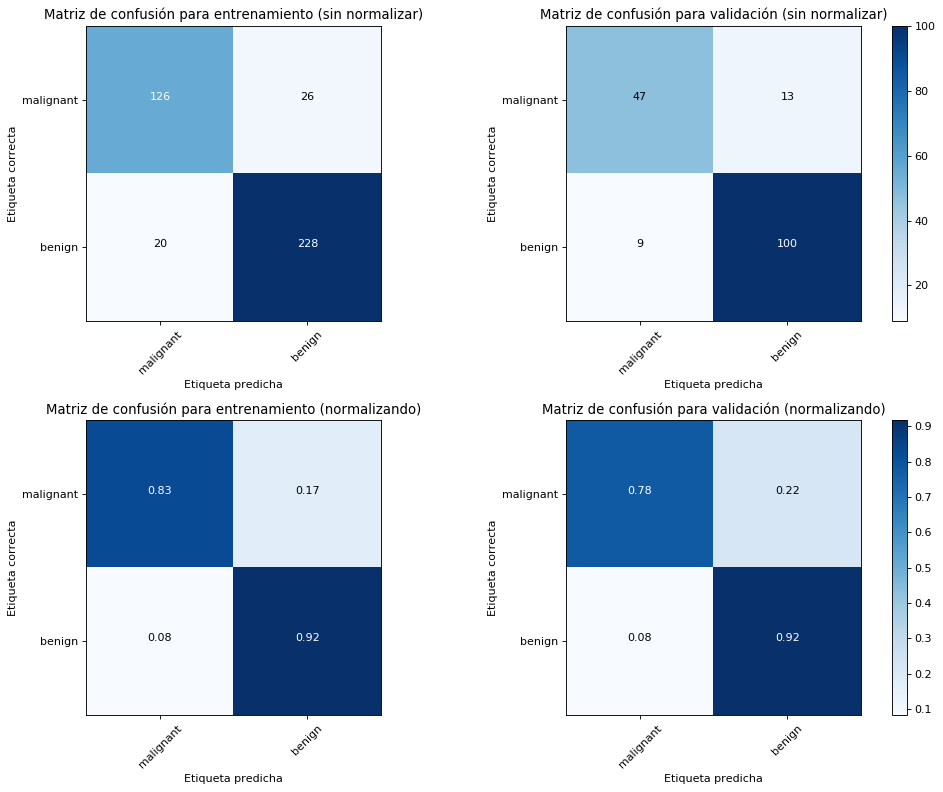

In [94]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

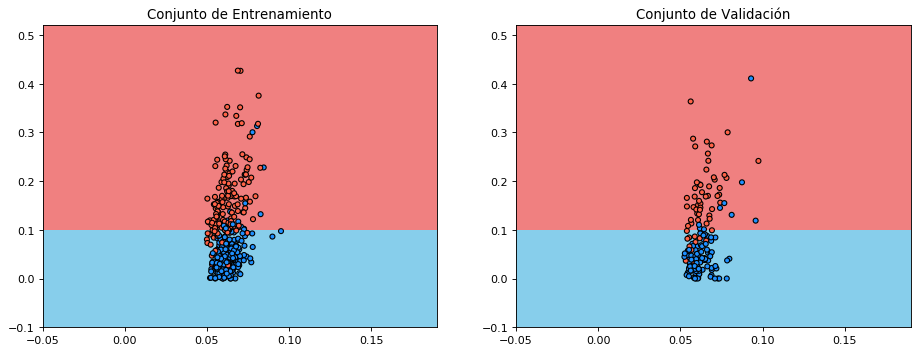

In [95]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

### Regresión logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [150]:
penalty = 'l1' # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha =  0.01 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

model = LogisticRegression(penalty=penalty, C=1./alpha)
model.fit(X_train_feature, y_train)

reg_log_train_acc = accuracy_score(y_train, model.predict(X_train_feature))
reg_log_val_acc = accuracy_score(y_val, model.predict(X_val_feature))
print('Exactitud para entrenamiento: %.2f' %  reg_log_train_acc)
print('Exactitud para validación: %.2f' % reg_log_val_acc)

Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.91


C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Tabla Resumen Breast Cancer Data Regresión Logística**

In [106]:
def insert_row_bc_reg_log(dict_to_apped):
    return df_bc_reg_log.append(dict_to_apped, ignore_index=True)

In [160]:
#df_bc_reg_log = df_bc_reg_log.drop(df_bc.index[5])
#df_bc_reg_log.to_csv('tabla_resumen_reg_log_bc.csv')
#df_bc_reg_log = pd.read_csv('tabla_resumen_reg_log_bc.csv', sep=',',usecols=['x_feature','y_feature','penalty','alpha','accuracy_train','accuracy_val'])
#df_bc_reg_log = df_bc_reg_log.drop(['Unnamed: 0'], axis =1)
#df_bc_reg_log = df_bc_reg_log.drop_duplicates()

In [151]:
#df_bc_reg_log = insert_row_bc_reg_log(df_bc_reg_log)
df_bc_reg_log = pd.read_csv('tabla_resumen_reg_log_bc.csv', sep=',')
df_bc_reg_log = df_bc_reg_log.drop(['Unnamed: 0'], axis =1)
df_bc_reg_log

,x_feature,y_feature,penalty,alpha,accuracy_train,accuracy_val
0,mean fractal dimension,mean concavity,l1,0.001,0.9100,0.911243
1,mean fractal dimension,mean concavity,l2,0.001,0.9175,0.899408
2,mean fractal dimension,mean concavity,l1,0.010,0.9150,0.911243
3,mean fractal dimension,mean concavity,l2,0.010,0.8900,0.881657
4,mean fractal dimension,mean concavity,l1,0.100,0.9175,0.899408
5,mean fractal dimension,mean concavity,l2,0.100,0.8650,0.869822


En este caso, todos los resultados obtenidos fueron superiores al 80% pero el caso de combinación de parámetros de mayor presición fue:

    -penalty = l1
    -alpha = 0.01
    

#### Matriz de confusión

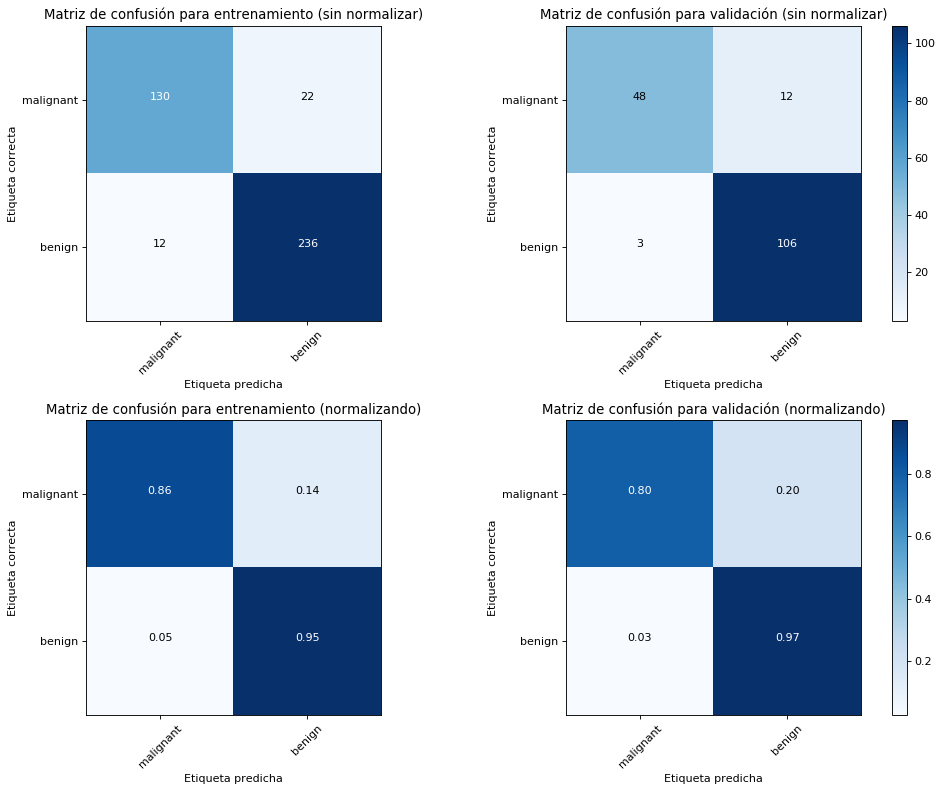

In [152]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

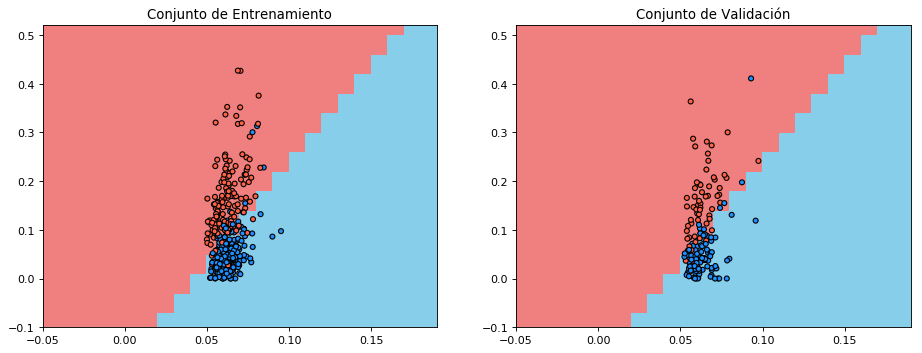

In [153]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

### Vecinos más cercanos

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [216]:
n_neighbors = 5 # TODO: Cantidad de vecinos a tener en cuenta
metric =  'euclidean' # TODO: Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train_feature, y_train)

kn_train_accuracy = accuracy_score(y_train, model.predict(X_train_feature))
kn_val_accuracy = accuracy_score(y_val, model.predict(X_val_feature))
print('Exactitud para entrenamiento: %.2f' % kn_train_accuracy )
print('Exactitud para validación: %.2f' % kn_val_accuracy)

Exactitud para entrenamiento: 0.92
Exactitud para validación: 0.89


**Tabla Resumen Breast Cancer KNN**

In [163]:
def insert_row_bc_kn(dict_to_apped):
    return bc_kneighbors.append(dict_to_apped, ignore_index=True)

In [164]:
#bc_kneighbors = bc_kneighbors.drop(bc_kneighbors.index[5])
#bc_kneighbors.to_csv('tabla_resumen_kneighbors_bc.csv')
#bc_kneighbors = pd.read_csv('tabla_resumen_kneighbors_bc.csv', sep=',')
#bc_kneighbors = bc_kneighbors.drop(['Unnamed: 0'], axis =1)
#bc_kneighbors = bc_kneighbors.drop_duplicates()

Como se vió en la clase, el K1 tiene error 0, es decir 100% de presición. Por lo que se continúa probando con valores de K mayores. Luego se puede ver que a medida que aumenta demasiado K, el error comienza a disminuir. Lo correcto sería realizar un cross validation entre el set de datos de entrenamiento y validación para ver con que valor de nos quedamos.

In [215]:
#bc_kneighbors = insert_row_bc_kn(bc_kneighbors_ana)
bc_kneighbors = pd.read_csv('tabla_resumen_knn_bc.csv', sep=',')
bc_kneighbors = bc_kneighbors.drop(['Unnamed: 0'], axis =1)
bc_kneighbors


,x_feature,y_feature,n_neighbors,metric,accuracy_train,accuracy_val
0,mean fractal dimension,mean concavity,1.0,euclidean,1.0000,0.834320
1,mean fractal dimension,mean concavity,3.0,euclidean,0.9225,0.875740
2,mean fractal dimension,mean concavity,5.0,euclidean,0.9150,0.887574
3,mean fractal dimension,mean concavity,7.0,euclidean,0.9150,0.869822
4,mean fractal dimension,mean concavity,13.0,euclidean,0.9100,0.869822
5,mean fractal dimension,mean concavity,21.0,euclidean,0.9075,0.863905
6,mean fractal dimension,mean concavity,3.0,cosine,0.9250,0.893491
7,mean fractal dimension,mean concavity,3.0,cosine,0.9250,0.893491
8,mean fractal dimension,mean concavity,7.0,cosine,0.9100,0.887574
9,mean fractal dimension,mean concavity,9.0,cosine,0.9125,0.887574


Siendo que no tenemos una diferencia considerable entre las distintas métricas, se considera la Euclídea por su beneficio en simpleza de cálculo

#### Matriz de confusión

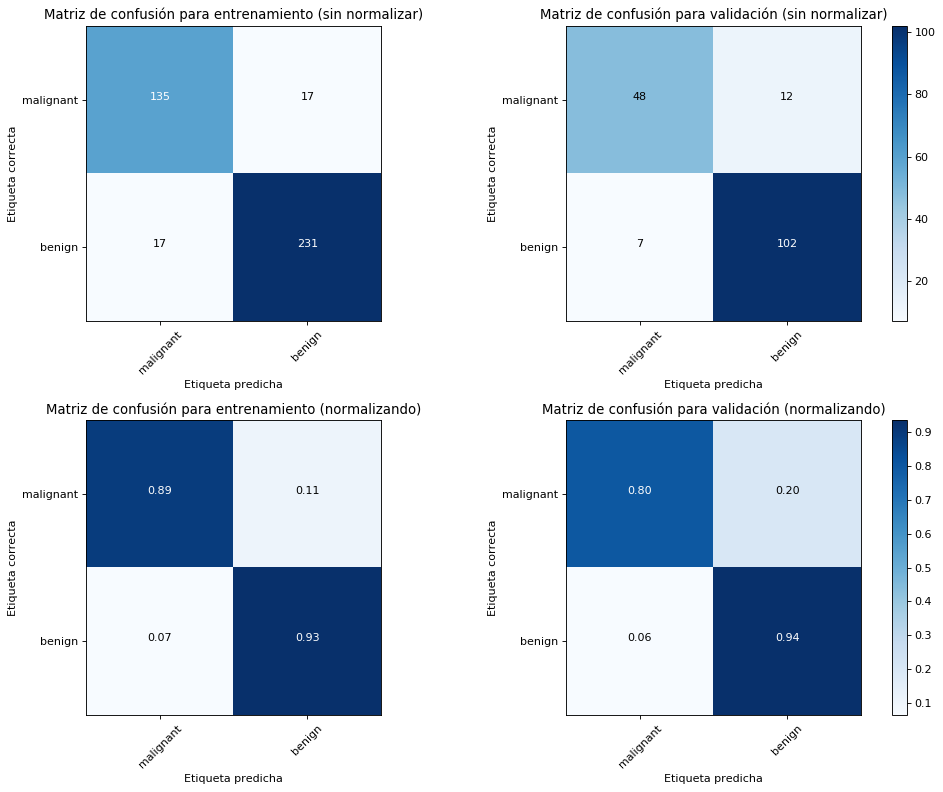

In [217]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

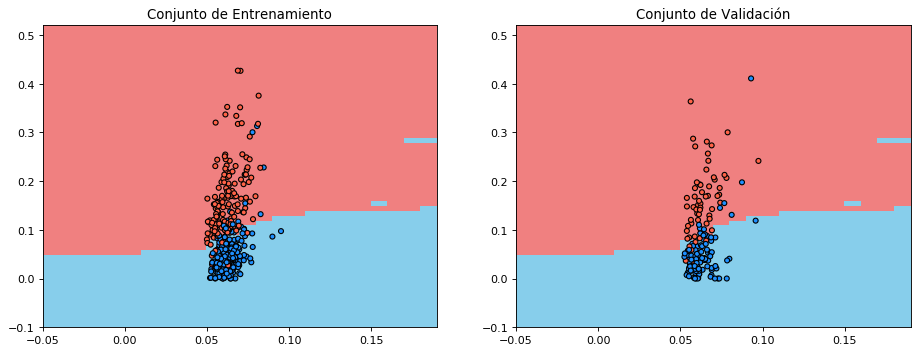

In [218]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

## Clasificación multiclase

Ahora veremos clasificación multiclase. Muy similar al caso anterior, con la diferencia de que en este caso hay más de dos etiquetas posibles para clasificación. Se utilizará el método `one-vs-all` (o también `one-vs-rest`) para hacer posible la clasificación.

Una vez más tenemos que decidir dos features para poder visualizar los modelos.

### Carga de datos

In [221]:
iris_data = load_iris()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(150)
shuff_train = shuff_data[:120]
shuff_val = shuff_data[120:]

X_train = iris_data['data'][shuff_train]
X_val = iris_data['data'][shuff_val]

y_train = iris_data['target'][shuff_train]
y_val = iris_data['target'][shuff_val]

feature_map = {feature: idx for idx, feature in enumerate(iris_data['feature_names'])}

print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print("Listado de atributos\n====================")
for feature in iris_data['feature_names']:
    print("- %s" % feature)

In [230]:
# Seleccionamos dos atributo de los listados en el apartado anterior, uno para el eje x y otro para el eje y
# TODO: Cambiar los atributos y ver como se modifica el resultado
x_feature = 'sepal length (cm)'
y_feature = 'petal length (cm)'

x_feature_col = feature_map[x_feature]
y_feature_col = feature_map[y_feature]
X_train_feature = X_train[:, [x_feature_col, y_feature_col]]
X_val_feature = X_val[:, [x_feature_col, y_feature_col]]

### Regresión logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [265]:
penalty = 'l2'  # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha =  0.01 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

model = LogisticRegression(penalty=penalty, C=1./alpha, multi_class='ovr')
model.fit(X_train_feature, y_train)

mc_reg_log_train_acc = accuracy_score(y_train, model.predict(X_train_feature))
mc_reg_log_val_acc = accuracy_score(y_val, model.predict(X_val_feature))
print('Exactitud para entrenamiento: %.2f' % mc_reg_log_train_acc )
print('Exactitud para validación: %.2f' % mc_reg_log_val_acc)

Exactitud para entrenamiento: 0.96
Exactitud para validación: 1.00


C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Tabla Resumen Iris Data Regresión Logística**

In [239]:
def insert_row_iris_mc_rlog(dict_to_apped):
    return iris_mc_reg_log.append(dict_to_apped, ignore_index=True)

In [164]:
#iris_mc_reg_log = iris_mc_reg_log.drop(iris_mc_reg_log.index[5])
#iris_mc_reg_log.to_csv('tabla_resumen_iris_mc_reg_log.csv')
#iris_mc_reg_log = pd.read_csv('tabla_resumen_iris_mc_reg_log.csv', sep=',')
#iris_mc_reg_log = iris_mc_reg_log.drop(['Unnamed: 0'], axis =1)
#iris_mc_reg_log = iris_mc_reg_log.drop_duplicates()

En el primer caso de análisis para los features definidos, se observa un 100% de precisión para el conjunto de validación, lo cual es poco probable que suceda en la realidad. Por lo que se continúa con la prueba de parámetros.

El análisis para los feaures sepal length y petal length resulta muy preciso, como se puede observar en la tabla resumen. El 100% de precisión es un indicativo que se deben tomar medidas para validar tanto los parámetros elegidos como el modelo, ya que en la realidad es imposible tener 100% de presición en un algoritmo de predicción.

Una hipótesis para esta situación de resultados tan precisos, es que puede haber un alto grado de correlación entre estas dos features que permita tener una presición tan alta.

In [264]:
#iris_mc_reg_log = insert_row_iris_mc_rlog(bc_mclas_ana)
iris_mc_reg_log = pd.read_csv('tabla_resumen_iris_mc_reg_log.csv', sep=',')
iris_mc_reg_log = iris_mc_reg_log.drop(['Unnamed: 0'], axis =1)
iris_mc_reg_log

,x_feature,y_feature,penalty,alpha,accuracy_train,accuracy_val
0,sepal length (cm),petal length (cm),l1,0.010,0.950000,1.000000
1,sepal length (cm),petal length (cm),l2,0.010,0.958333,1.000000
2,sepal length (cm),petal length (cm),l1,0.001,0.950000,1.000000
3,sepal length (cm),petal length (cm),l2,0.001,0.950000,1.000000
4,sepal length (cm),petal length (cm),l1,0.100,0.958333,1.000000
5,sepal length (cm),petal length (cm),l2,0.100,0.958333,0.966667


#### Matriz de confusión

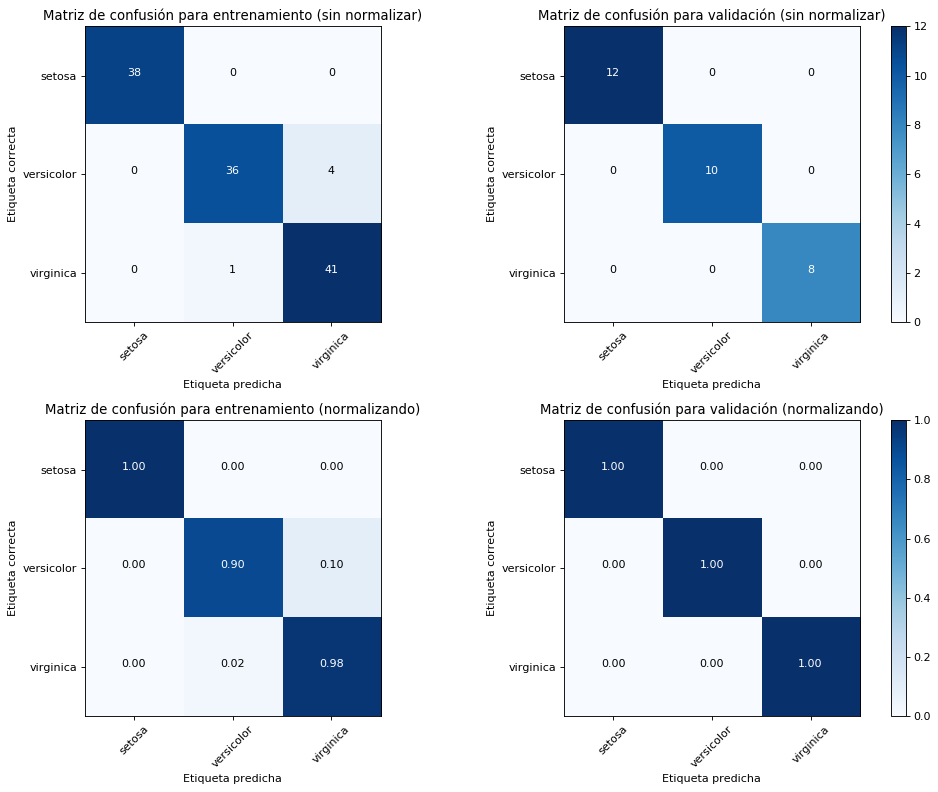

In [266]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

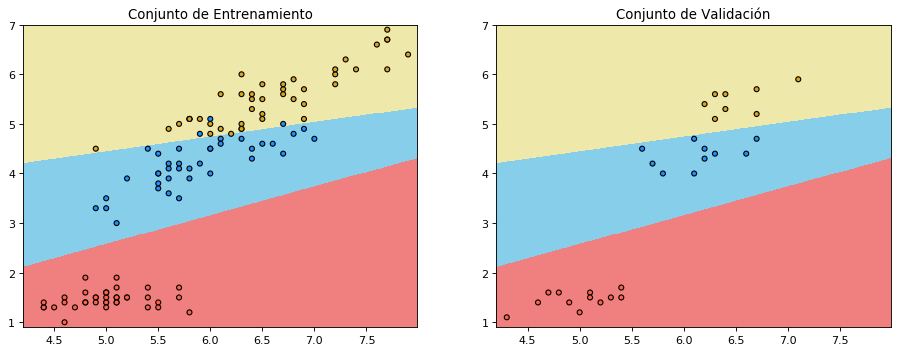

In [267]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

### Vecinos más cercanos

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [302]:
n_neighbors = 21 # TODO: Cantidad de vecinos a tener en cuenta
metric =  'euclidean' # TODO: Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train_feature, y_train)

iris_knn_train_acc = accuracy_score(y_train, model.predict(X_train_feature))
iris_knn_val_acc = accuracy_score(y_val, model.predict(X_val_feature))

print('Exactitud para entrenamiento: %.2f' %  iris_knn_train_acc)
print('Exactitud para validación: %.2f' % iris_knn_val_acc)

Exactitud para entrenamiento: 0.94
Exactitud para validación: 1.00


**Tabla Resumen Iris Data KNN**

In [287]:
def insert_row_iris_kn(dict_to_apped):
    return iris_kneighbors.append(dict_to_apped, ignore_index=True)

In [164]:
#iris_kneighbors = iris_kneighbors.drop(iris_kneighbors.index[5])
#iris_kneighbors.to_csv('tabla_resumen_knn_iris.csv')
#iris_kneighbors = pd.read_csv('tabla_resumen_knn_iris.csv', sep=',')
#iris_kneighbors = iris_kneighbors.drop(['Unnamed: 0'], axis =1)
#iris_kneighbors = iris_kneighbors.drop_duplicates()

In [308]:
#iris_kneighbors = insert_row_iris_kn(iris_kneighbors_ana)
iris_kneighbors = pd.read_csv('tabla_resumen_knn_iris.csv', sep=',')
iris_kneighbors = iris_kneighbors.drop(['Unnamed: 0'], axis =1)
iris_kneighbors

,x_feature,y_feature,n_neighbors,metric,accuracy_train,accuracy_val
0,sepal length (cm),petal length (cm),1.0,euclidean,0.991667,0.966667
1,sepal length (cm),petal length (cm),3.0,euclidean,0.950000,1.000000
2,sepal length (cm),petal length (cm),7.0,euclidean,0.950000,1.000000
3,sepal length (cm),petal length (cm),13.0,euclidean,0.941667,1.000000
4,sepal length (cm),petal length (cm),21.0,euclidean,0.941667,1.000000


De manera similar a lo planteado en el caso anterior que se aplico el método de KNN, podemos ver como varía la frontera de desición a medida que K cambia y una vez mas se plantea la importancia de alterar entre el set de entrenamiento y validación para definir el K a utilizar en el modelo final.

#### Matriz de confusión

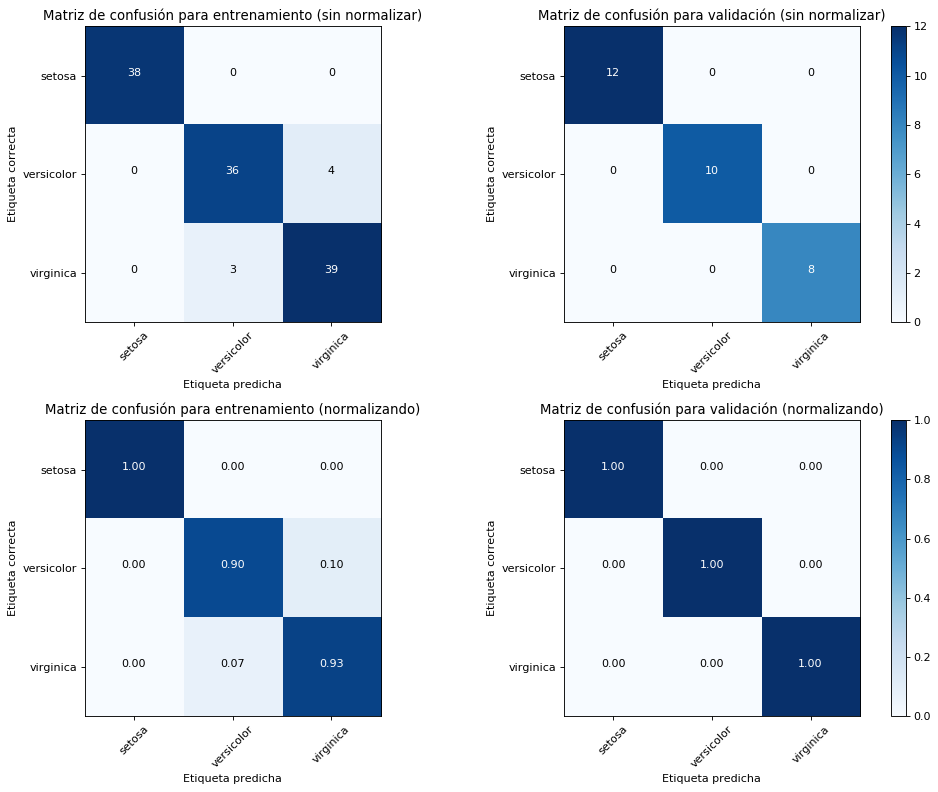

In [300]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

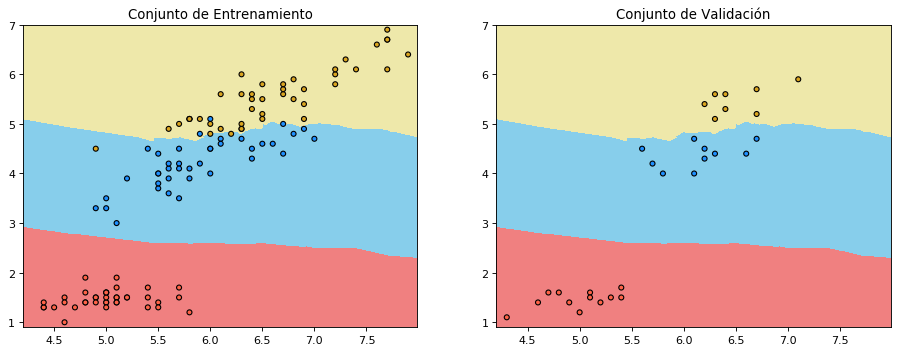

In [301]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1
           )
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

### CONCLUSIÓN

Este práctico permitió repasar todos los modelos vistos en clase y realizando diferentes análisis cambiando los hyperparámetros y parámetros de cada modelo se pudo entender con mayor profundidad la implicancia de cada uno en el modelo elegido. 

Si bien es importante entender la importancia de definir el set de entrenamiento y el de validación, un error en estos pasos iniciales puede generar que el modelo de predicción final sea completamente errado.

A su vez, es importante enteder cuando se puede presentar un caso de overfitting para no caer en esto al momento de analizar resultados finales ya que en esos casos siempre el desarrollador puede cometer esos vicios en el modelaje
